In [1]:


def is_kl_sparse(g,k:int,l:int):
    r'''
    pebble game algorithm for deciding if `g` is (k,l)-sparse.
    `g` may have multiedges and loops
    use `g=Graph(multiedges=True,loops=True)` from sagemath graph
    https://linkinghub.elsevier.com/retrieve/pii/S0012365X07005602
    '''
    assert(k>0 and l>=0 and l<=2*k-1)
    d=DiGraph(multiedges=True,loops=True)
    d.add_vertices(g.vertex_iterator())
    peb=[k for _ in d.vertex_iterator()]
    edges=g.edges(labels=False)
    def dfs(u,v): # returns if u can get pebble. dfs should not touch v
        vis=[False for _ in d.vertex_iterator()]
        pre=[-1 for _ in d.vertex_iterator()]
        st=[]
        vis[u]=vis[v]=True
        st.append(u)
        while len(st):
            h=st.pop()
            if(peb[h]>0):
                peb[h]=peb[h]-1
                while pre[h]!=-1:
                    d.reverse_edge((pre[h],h))
                    h=pre[h]
                peb[h]=peb[h]+1
                return True
            for c in d.neighbor_out_iterator(h):
                if not vis[c]:
                    vis[c]=True
                    st.append(c)
                    pre[c]=h
        return False
        
    def edgeinsertion(u,v):
        if peb[u]==0: u,v=v,u
        d.add_edge(u,v)
        peb[u]=peb[u]-1

    rej=0
    for (u,v) in edges:
        if peb[u]+peb[v]>=l+1:
            edgeinsertion(u,v)
        else:
            while True:
                tryu=tryv=False
                if peb[u]<k: tryu=dfs(u,v)
                if peb[u]+peb[v]==l+1:
                    edgeinsertion(u,v)
                    break
                if peb[v]<k: tryv=dfs(v,u)
                if peb[u]+peb[v]==l+1:
                    edgeinsertion(u,v)
                    break
                if not tryu and not tryv:
                    rej=rej+1
                    break
        # d.plot().show()
        # input()
    
    pebsum=sum(peb)
    if pebsum==l:
        if rej==0: return "tight"
        else: return "spanning"
    elif pebsum>l and rej==0: return "sparse"
    else: return "other"


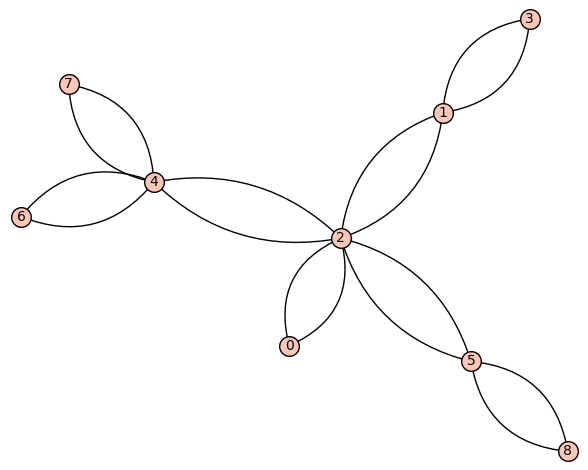

tight


In [2]:
d=Graph(multiedges=True,loops=True)
d.add_edges([(0,2),(1,2),(1,3),(2,4),(2,5),(4,6),(4,7),(5,8)])
# d.plot().show()
# print(is_kl_sparse(d,1,1))
# d.add_edge(4,6)
for e in d.edges(labels=false): d.add_edge(e)
d.plot().show()
print(is_kl_sparse(d,2,2))
